In [2]:
# !pip install --upgrade tensorflow
#then restart and clear all cells DO NOT FACTORY RESET

In [22]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
    Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('/kaggle/input/sampled-test-hand-labeled/sampled_test_hand_labeled.csv')

In [5]:
df.head()

,Unnamed: 0,text,label
0,0,militants engaged former officials hamid karza...,1
1,1,american spirit gets lebanese makeover beirut ...,1
2,2,pleasant protest tyranny workplace productivit...,1
3,3,see latest charts maps coronavirus cases death...,0
4,4,biden administration said measures would degra...,1


In [6]:
corpus = df['text'].tolist()

In [7]:
corpus

['militants engaged former officials hamid karzai abdullah abdullah well moscow seek help building inclusive government cementing rule chaos persists kabul airport taliban discuss new government',
 'american spirit gets lebanese makeover beirut potomac',
 'pleasant protest tyranny workplace productivity letter recommendation drinking lunch',
 'see latest charts maps coronavirus cases deaths hospitalizations dixon area lee county illinois covid case risk tracker',
 'biden administration said measures would degrade ability wage war ukraine would prevent belarus channeling forbidden goods russia u extends technology restrictions belarus russian oil industry',
 'several retailers ended pay raises bonuses gave employees appreciation courage commitment showing work pandemic hero pay raises disappear many essential workers',
 'see latest charts maps coronavirus cases deaths hospitalizations pendleton county kentucky pendleton county kentucky covid case risk tracker',
 'parents crucial ever ch

In [8]:
# Define the corpus
# corpus = ['The cat sat on the mat',
#           'The dog ran in the park',
#           'The bird sang in the tree']

 
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)

After converting our words in the corpus into vector of integers:
[[212, 213, 214, 215, 216, 217, 83, 83, 54, 218, 219, 84, 220, 221, 85, 222, 223, 224, 225, 226, 227, 228, 229, 26, 85], [23, 230, 55, 231, 232, 233, 234], [235, 86, 236, 237, 238, 87, 239, 240, 241], [1, 8, 12, 2, 6, 9, 13, 14, 242, 24, 243, 3, 88, 10, 7, 11, 15], [89, 27, 56, 244, 34, 245, 246, 90, 91, 247, 34, 248, 92, 249, 250, 251, 40, 17, 252, 93, 57, 92, 253, 254, 58], [255, 256, 257, 35, 94, 258, 259, 95, 260, 261, 262, 263, 264, 21, 265, 35, 94, 266, 59, 267, 28], [1, 8, 12, 2, 6, 9, 13, 14, 96, 3, 41, 96, 3, 41, 10, 7, 11, 15], [268, 269, 97, 60, 98, 36, 270, 271, 272, 99, 273, 42, 274, 100, 275, 61, 276, 277, 62, 278], [101, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290], [291, 292, 293, 43, 294, 295, 296, 27, 297, 102, 90, 103, 62], [29, 104, 22, 63, 298, 299, 105, 106, 300, 44, 22, 301, 18, 302], [1, 8, 12, 2, 6, 9, 13, 14, 107, 108, 3, 109, 107, 108, 3, 109, 10, 7, 11, 15], [1, 16, 4, 2, 110, 5

In [9]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2
 
# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] +\
            sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

In [10]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
 

In [11]:
X_train = X
y_train = df['label']
y_train = np.array(y_train)

In [12]:
type(X_train)

numpy.ndarray

In [13]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [14]:
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.save_weights('cbow_weights.h5')
 
 
# Load the pre-trained weights
model.load_weights('cbow_weights.h5')

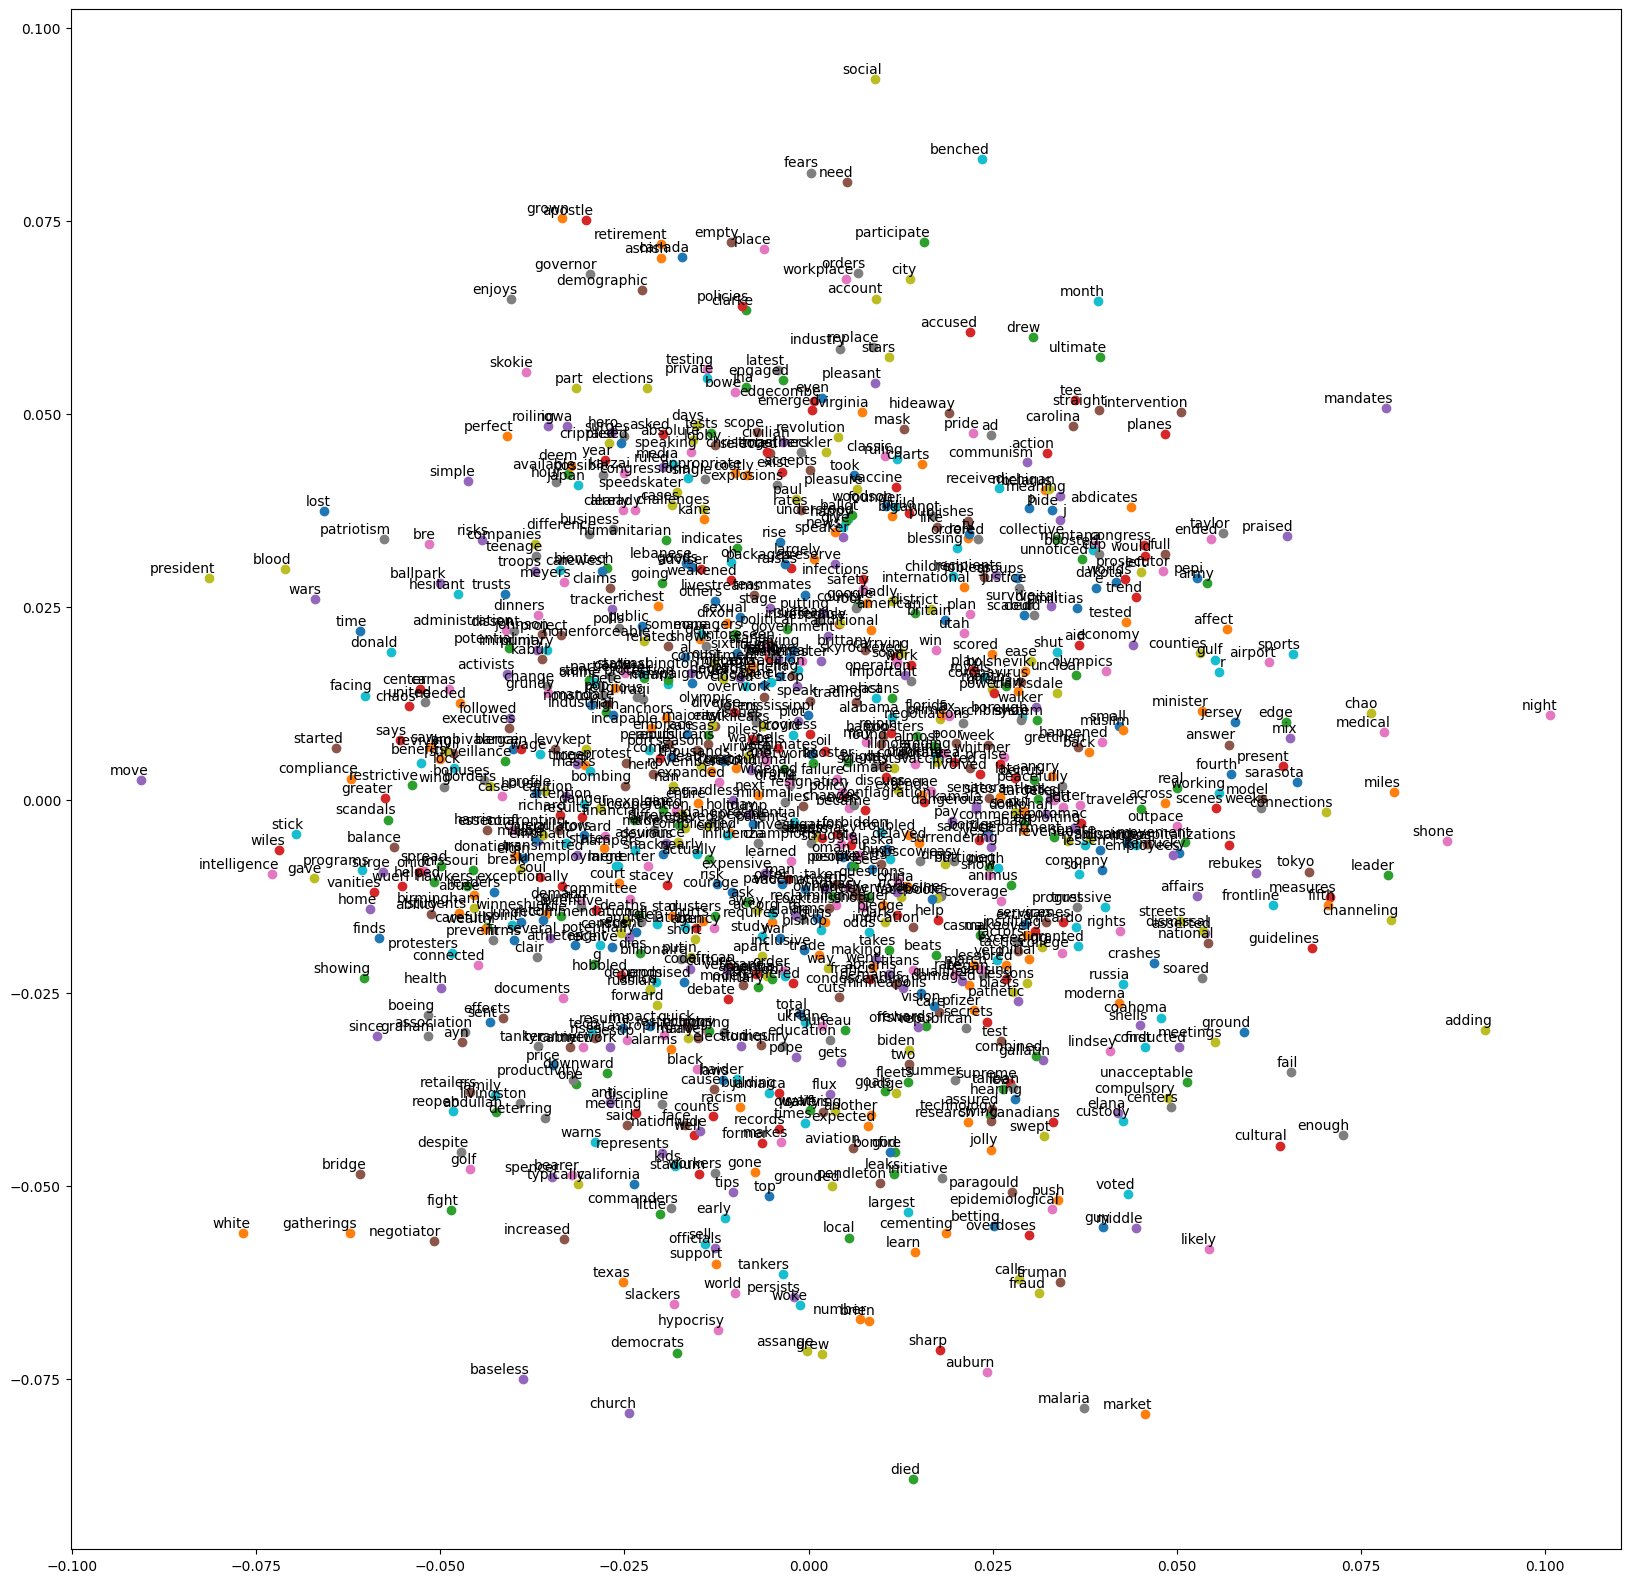

In [15]:
# Get the word embeddings
embeddings = model.get_weights()[0]
 
# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
 
# Visualize the embeddings
plt.figure(figsize=(20, 20))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

"This visualization allows us to observe the similarity of the words based on their embeddings. Words that are similar in meaning or context are expected to be close to each other in the plot."

In [16]:
# Source: https://www.geeksforgeeks.org/continuous-bag-of-words-cbow-in-nlp/

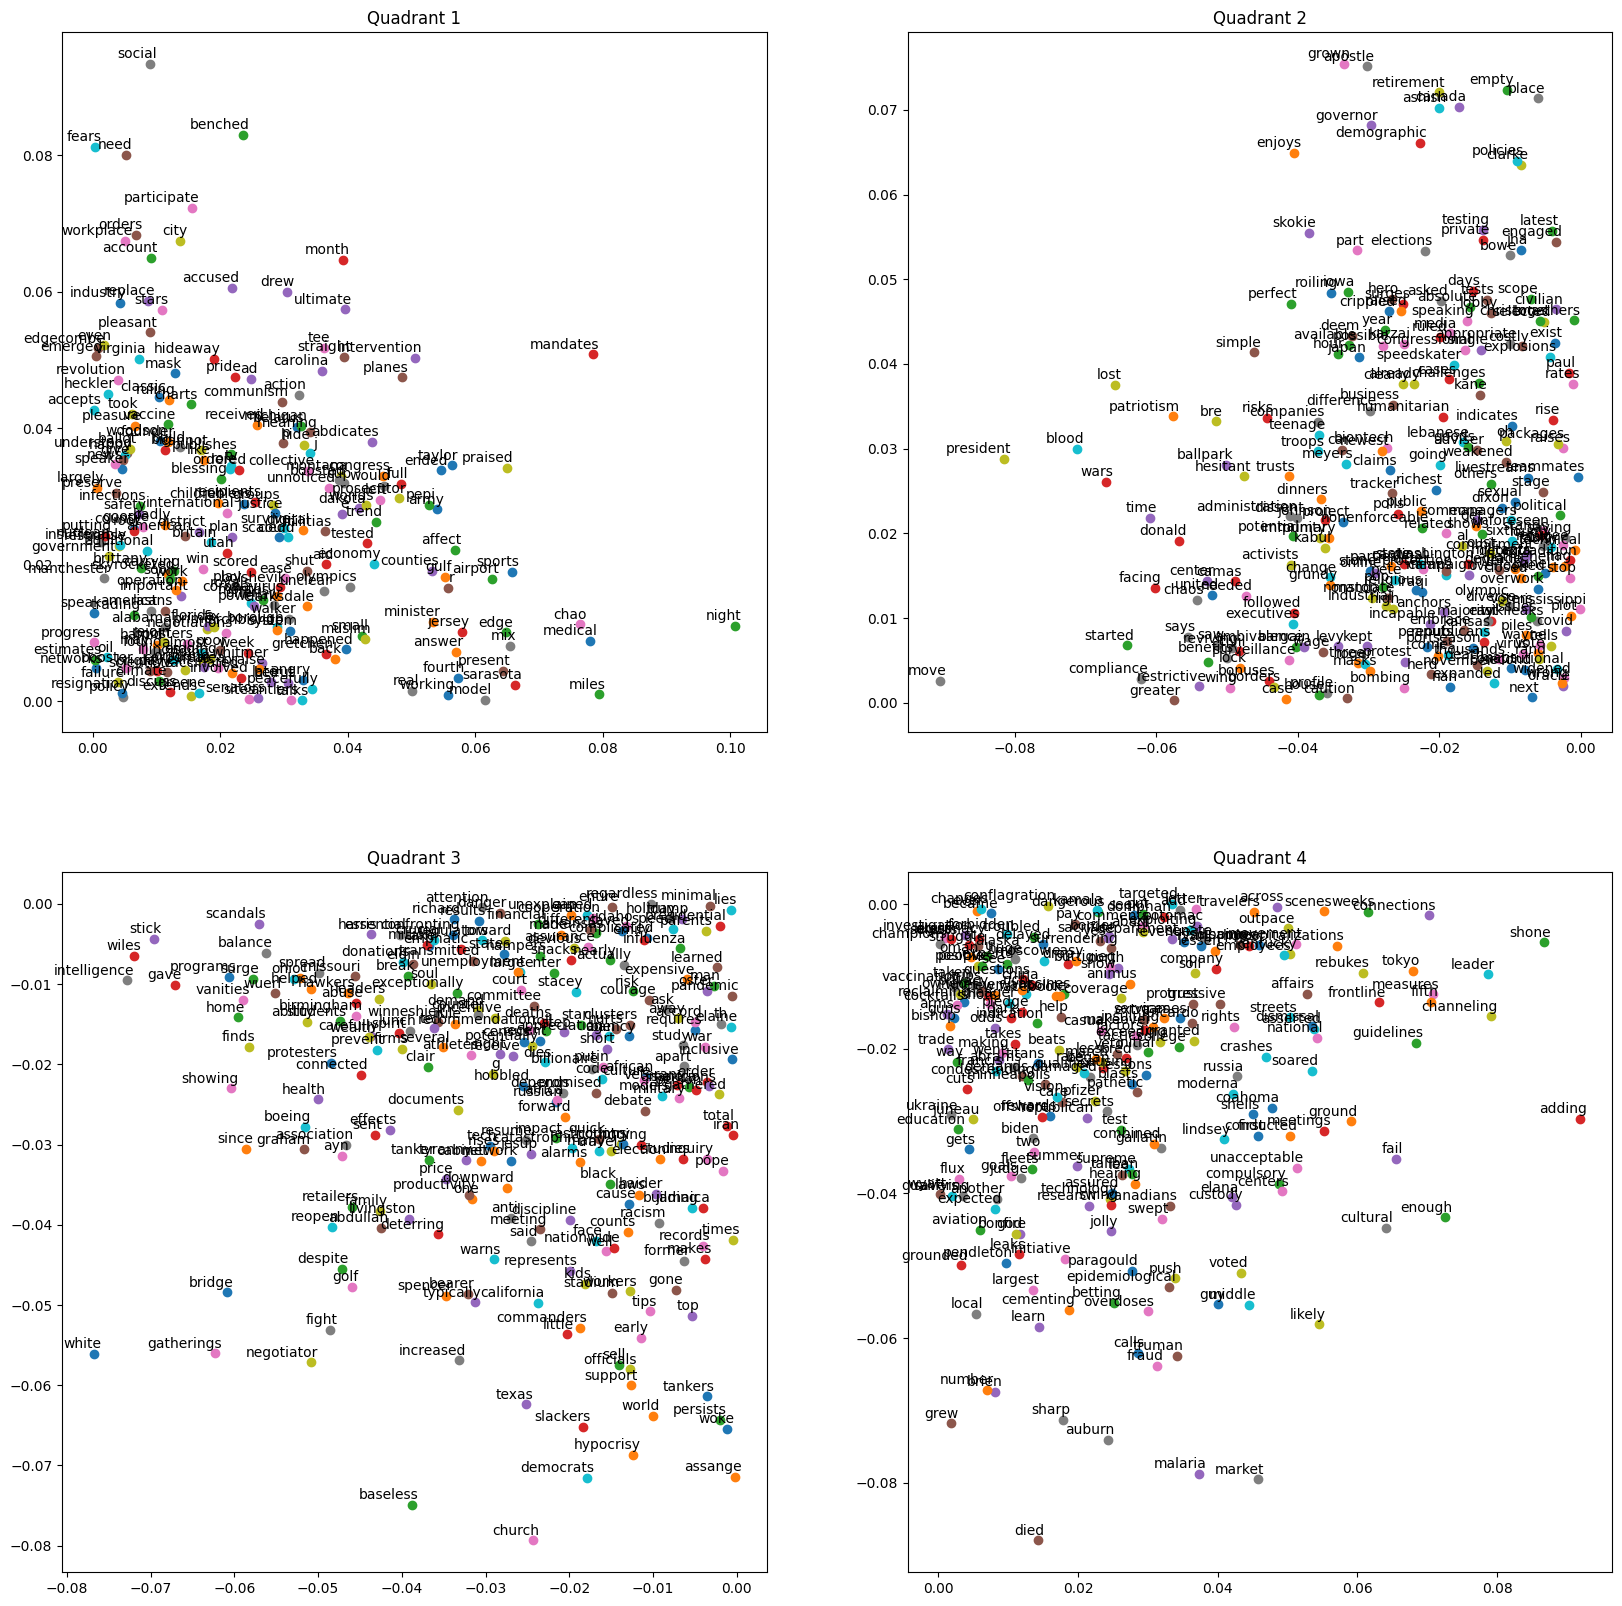

In [17]:

# Assuming 'model' and 'tokenizer' are defined

# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Quadrant 1
axs[0, 0].set_title('Quadrant 1')
for i, word in enumerate(tokenizer.word_index.keys()):
    if reduced_embeddings[i, 0] >= 0 and reduced_embeddings[i, 1] >= 0:
        axs[0, 0].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        axs[0, 0].annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           xytext=(5, 2), textcoords='offset points',
                           ha='right', va='bottom')

# Quadrant 2
axs[0, 1].set_title('Quadrant 2')
for i, word in enumerate(tokenizer.word_index.keys()):
    if reduced_embeddings[i, 0] < 0 and reduced_embeddings[i, 1] >= 0:
        axs[0, 1].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        axs[0, 1].annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           xytext=(5, 2), textcoords='offset points',
                           ha='right', va='bottom')

# Quadrant 3
axs[1, 0].set_title('Quadrant 3')
for i, word in enumerate(tokenizer.word_index.keys()):
    if reduced_embeddings[i, 0] < 0 and reduced_embeddings[i, 1] < 0:
        axs[1, 0].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        axs[1, 0].annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           xytext=(5, 2), textcoords='offset points',
                           ha='right', va='bottom')

# Quadrant 4
axs[1, 1].set_title('Quadrant 4')
for i, word in enumerate(tokenizer.word_index.keys()):
    if reduced_embeddings[i, 0] >= 0 and reduced_embeddings[i, 1] < 0:
        axs[1, 1].scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        axs[1, 1].annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                           xytext=(5, 2), textcoords='offset points',
                           ha='right', va='bottom')

# Show the subplots
plt.show()


In [18]:
# # Save the entire figure
# plt.savefig('cbow_plot.png')

# # Save individual quadrants
# axs[0, 0].figure.savefig('quadrant_1.png')
# axs[0, 1].figure.savefig('quadrant_2.png')
# axs[1, 0].figure.savefig('quadrant_3.png')
# axs[1, 1].figure.savefig('quadrant_4.png')


# Word2Vec Gensim Model Try

In [24]:
from gensim.models import Word2Vec


In [25]:
# Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in df['text']]

# Split data into training and testing sets
train_sentences, test_sentences = train_test_split(tokenized_sentences, test_size=0.2, random_state=42)

# Train Word2Vec model using Skip-gram
word2vec_model = Word2Vec(sentences=train_sentences, vector_size=50, window=5, sg=1, min_count=1, workers=4)

# Save or use the trained embeddings
word_embeddings = word2vec_model.wv

In [26]:
word_embeddings

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity

# Drop rows with NaN values
df = df.dropna(subset=['text'])

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X_padded = pad_sequences(X)

# Extract labels
y = np.array(df['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Calculate vocabulary size and embedding size
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 50  # Adjust as needed

# Define a simple neural network for binary classification
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    input_length=X_padded.shape[1]))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), 
              loss=binary_crossentropy,
              metrics=[Accuracy()])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
evaluation = model.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Access the learned word embeddings from the embedding layer
embedding_layer = model.layers[0]
word_embeddings = embedding_layer.get_weights()[0]

# Assuming tokenizer is already defined
word_index = tokenizer.word_index

# Create a dictionary to map words to their corresponding embeddings
word_to_embedding = {word: word_embeddings[idx] for word, idx in word_index.items() if idx < len(word_embeddings)}

Epoch 1/10
2/2 [==============================] - 1s 330ms/step - loss: 0.6902 - accuracy: 0.0000e+00 - val_loss: 0.6996 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 186ms/step - loss: 0.6470 - accuracy: 0.0000e+00 - val_loss: 0.7065 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 117ms/step - loss: 0.6082 - accuracy: 0.0000e+00 - val_loss: 0.7085 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 191ms/step - loss: 0.5685 - accuracy: 0.0000e+00 - val_loss: 0.7020 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 198ms/step - loss: 0.5258 - accuracy: 0.0000e+00 - val_loss: 0.6872 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 117ms/step - loss: 0.4765 - accuracy: 0.0000e+00 - val_loss: 0.6747 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 188ms/step - loss: 0.4240 - accuracy: 0.0000e+00 - val_loss

In [49]:
# Example: Get the embedding for the word "county"
embedding_bias = word_to_embedding.get('county')

# Check if the word "county" is in the vocabulary
if embedding_bias is not None:
    # Handle NaN values in the embeddings and reshape for cosine similarity
    embedding_bias = np.nan_to_num(embedding_bias, nan=0.0).reshape(1, -1)

    # Perform a task like similarity analysis
    # Example: Find words similar to "county"
    similar_words = {word: cosine_similarity(embedding_bias, word_to_embedding[word].reshape(1, -1))[0][0] for word in word_to_embedding}

    # Example: Print the words with the highest similarity to "county"
    sorted_similar_words = sorted(similar_words.items(), key=lambda x: x[1], reverse=True)
    print("Words similar to 'county':", sorted_similar_words[:5])
else:
    print("The word 'county' is not in the vocabulary.")


Words similar to 'county': [('county', 1.0000002), ('stars', 0.43190408), ('borough', 0.38768423), ('utah', 0.378458), ('times', 0.37646192)]


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df is your dataframe with a 'text' column
text_data = df['text'].astype(str)

# Create a CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(text_data)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum the counts for each word
word_counts = X.sum(axis=0)

# Create a DataFrame with words and their counts
word_count_df = pd.DataFrame({'word': feature_names, 'count': word_counts.A1})

# Sort the DataFrame by counts in descending order
word_count_df = word_count_df.sort_values(by='count', ascending=False)

# Display the top 10 most common words
top_words = word_count_df.head(10)
print(top_words)


            word  count
478         maps     34
197       county     32
667      results     31
267     election     31
190  coronavirus     28
128         case     23
685         risk     21
129        cases     21
201        covid     21
439       latest     21
